SVM complet

In [1]:
#Import des bibliothèques nécessaires
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#Import des données
df = pd.read_csv(r"C:\Users\Dylan\Desktop\Portfolio\MPG\MPG ENCODED.csv")

#Division des données
X = df.drop('Note_encoded', axis=1)
y = df['Note_encoded']

#Entrainement du modèle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Standardisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Création du modèle SVM avec noyau
model = SVC(kernel='rbf')

#Entraînement du modèle sur les données d'entraînement
model.fit(X_train_scaled, y_train)

#Obtention des indices des vecteurs de support
support_indices = np.where(model.n_support_ > 0)[0]

#Obtention des coefficients attribués aux vecteurs de support
support_dual_coefficients = model.dual_coef_[0]

#Association des indices des vecteurs de support aux noms des caractéristiques
feature_names = X.columns
support_feature_importance = [(feature_names[i], coef) for i, coef in zip(support_indices, support_dual_coefficients)]



Print des scores de train et de test

In [2]:
print('Score sur ensemble train', model.score(X_train, y_train))

print('Score sur ensemble test', model.score(X_test, y_test))

Score sur ensemble train 0.1625
Score sur ensemble test 0.1711229946524064


c:\Users\Dylan\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\Dylan\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Matrice de confusion du SVM

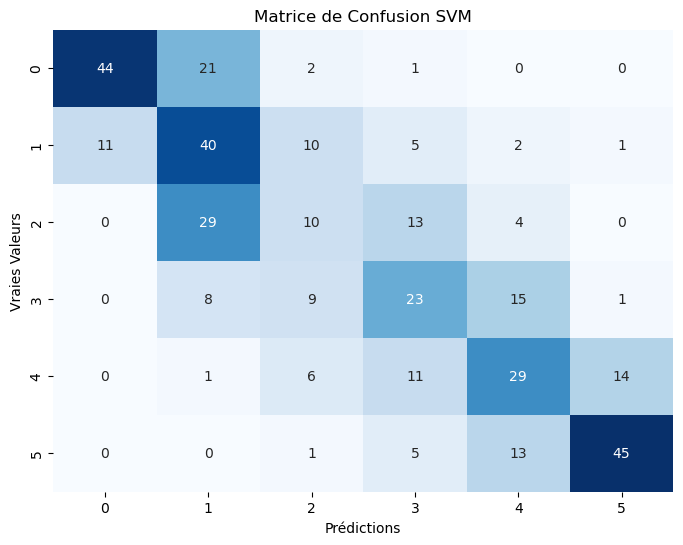

In [3]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#Obtention des prédictions du modèle
y_pred = model.predict(X_test_scaled)

#Création de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

#Affichage de la matrice de confusion avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Prédictions')
plt.ylabel('Vraies Valeurs')
plt.title('Matrice de Confusion SVM')
plt.show()

In [4]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score



Affichage des scores de classification du SVM

In [5]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt

#Création du modèle SVM
model = SVC(probability=True, random_state=42)

#Entraînement du modèle
model.fit(X_train, y_train)

#Obtention des prédictions du modèle
y_pred = model.predict(X_test)

#Calcul des métriques de classification
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

#Affichage des métriques
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



Accuracy: 0.25133689839572193
Precision: 0.3428630271080236
Recall: 0.25133689839572193
F1 Score: 0.20021676566922392


c:\Users\Dylan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
